 # Banking Customer Creditworthiness Score

IMPORTING DATASET

In [ ]:
import pandas as pd

df=pd.read_csv("LC_loans_granting_model_dataset.csv")

C:\Users\anusiya\AppData\Local\Temp\ipykernel_16908\2473554886.py:3: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("LC_loans_granting_model_dataset.csv")


UNDERSTANDING BASIC INFO

In [ ]:
df.head()

,id,issue_d,revenue,dti_n,loan_amnt,fico_n,experience_c,emp_length,purpose,home_ownership_n,addr_state,zip_code,Default,title,desc
0,68407277,Dec-2015,55000.0,5.91,3600,677.0,1,10+ years,debt_consolidation,MORTGAGE,PA,190xx,0,Debt consolidation,NaN
1,68355089,Dec-2015,65000.0,16.06,24700,717.0,1,10+ years,small_business,MORTGAGE,SD,577xx,0,Business,NaN
2,68341763,Dec-2015,71000.0,13.85,20000,697.0,1,10+ years,home_improvement,MORTGAGE,IL,605xx,0,NaN,NaN
3,68476807,Dec-2015,104433.0,25.37,10400,697.0,1,3 years,major_purchase,MORTGAGE,PA,174xx,0,Major purchase,NaN
4,68426831,Dec-2015,34000.0,10.20,11950,692.0,1,4 years,debt_consolidation,RENT,GA,300xx,0,Debt consolidation,NaN


In [ ]:
df.shape

(1347681, 15)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1347681 entries, 0 to 1347680
Data columns (total 15 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   id                1347681 non-null  int64  
 1   issue_d           1347681 non-null  object 
 2   revenue           1347681 non-null  float64
 3   dti_n             1347681 non-null  float64
 4   loan_amnt         1347681 non-null  int64  
 5   fico_n            1347681 non-null  float64
 6   experience_c      1347681 non-null  int64  
 7   emp_length        1347681 non-null  object 
 8   purpose           1347681 non-null  object 
 9   home_ownership_n  1347681 non-null  object 
 10  addr_state        1347681 non-null  object 
 11  zip_code          1347680 non-null  object 
 12  Default           1347681 non-null  int64  
 13  title             1331024 non-null  object 
 14  desc              119099 non-null   object 
dtypes: float64(3), int64(4), object(8)
memory usage: 

In [ ]:
df.describe()

,id,revenue,dti_n,loan_amnt,fico_n,experience_c,Default
count,1.347681e+06,1.347681e+06,1.347681e+06,1.347681e+06,1.347681e+06,1.347681e+06,1.347681e+06
mean,5.621359e+07,7.736968e+04,1.829909e+01,1.440823e+04,6.981589e+02,9.999814e-01,1.997869e-01
std,3.839501e+07,7.036299e+04,1.115214e+01,8.715347e+03,3.184872e+01,4.306977e-03,3.998402e-01
min,5.473400e+04,1.896000e+03,0.000000e+00,5.000000e+02,6.120000e+02,0.000000e+00,0.000000e+00
25%,1.970651e+07,4.660000e+04,1.182000e+01,7.975000e+03,6.720000e+02,1.000000e+00,0.000000e+00
50%,5.766422e+07,6.500000e+04,1.763000e+01,1.200000e+04,6.920000e+02,1.000000e+00,0.000000e+00
75%,8.449505e+07,9.200000e+04,2.407000e+01,2.000000e+04,7.120000e+02,1.000000e+00,0.000000e+00
max,1.456364e+08,1.099920e+07,9.990000e+02,4.000000e+04,8.475000e+02,1.000000e+00,1.000000e+00


In [ ]:
df.isnull().sum()

id                        0
issue_d                   0
revenue                   0
dti_n                     0
loan_amnt                 0
fico_n                    0
experience_c              0
emp_length                0
purpose                   0
home_ownership_n          0
addr_state                0
zip_code                  1
Default                   0
title                 16657
desc                1228582
dtype: int64

In [ ]:
df.duplicated().sum()

np.int64(0)

DATA CLEANING

title and desc are text and mostly have missing values so i drop the columns

In [ ]:
df.drop(["title", "desc"], axis=1, inplace=True)


find one missing value in zip code so i drop it

In [ ]:
df = df.dropna(subset=["zip_code"])


cleaning employee length which has special character and missing values are available. which not null in string and null in numeric i manage that with filling median value to empty fields 

In [ ]:
print("before cleaning emp_length")
print(df.emp_length)

before cleaning emp_length
0          10+ years
1          10+ years
2          10+ years
3            3 years
4            4 years
             ...    
1347676      5 years
1347677      9 years
1347678      3 years
1347679    10+ years
1347680      6 years
Name: emp_length, Length: 1347680, dtype: object


In [ ]:
def clean_emp_length(x):
    x = str(x).strip().lower()
    
    # Missing or unknown values
    if x in ["nan", "none", "ni", "n/a", "na", ""]:
        return None
    
    # 10+ years
    if "10" in x:
        return 10
    
    # < 1 year
    if "<" in x:
        return 0
    
    # Convert "3 years", "7 years", "2 year" safely
    try:
        return int(x.split()[0])
    except:
        return None


In [ ]:
df["emp_length"] = df["emp_length"].apply(clean_emp_length)


In [ ]:
print(df.emp_length)

0          10.0
1          10.0
2          10.0
3           3.0
4           4.0
           ... 
1347676     5.0
1347677     9.0
1347678     3.0
1347679    10.0
1347680     6.0
Name: emp_length, Length: 1347680, dtype: float64


In [ ]:
df["emp_length"].isnull().sum()


np.int64(78188)

In [ ]:
df["emp_length"].fillna(df["emp_length"].median(), inplace=True)

C:\Users\anusiya\AppData\Local\Temp\ipykernel_16908\692194195.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["emp_length"].fillna(df["emp_length"].median(), inplace=True)


In [ ]:
df["emp_length"].isnull().sum()


np.int64(0)

coverting data format 

In [ ]:
print(df.issue_d)

0          Dec-2015
1          Dec-2015
2          Dec-2015
3          Dec-2015
4          Dec-2015
             ...   
1347676    Oct-2016
1347677    Oct-2016
1347678    Oct-2016
1347679    Oct-2016
1347680    Oct-2016
Name: issue_d, Length: 1347680, dtype: object


In [ ]:
df["issue_d"] = pd.to_datetime(df["issue_d"], format="%b-%Y")


In [ ]:
print(df.issue_d)

0         2015-12-01
1         2015-12-01
2         2015-12-01
3         2015-12-01
4         2015-12-01
             ...    
1347676   2016-10-01
1347677   2016-10-01
1347678   2016-10-01
1347679   2016-10-01
1347680   2016-10-01
Name: issue_d, Length: 1347680, dtype: datetime64[ns]


cap 

In [ ]:
df["revenue"].max()


10999200.0

In [ ]:
df["revenue"] = df["revenue"].clip(upper=300000)  # keep max income = 3 lakh


In [ ]:
df["revenue"].max()


300000.0

In [ ]:
df["dti_n"].max()


999.0

In [ ]:
df["dti_n"] = df["dti_n"].clip(upper=100)


In [ ]:
df["dti_n"].max()


100.0

In [ ]:
df = df.drop(columns=["issue_d"])
print("issue_d removed.")

df = df.drop(columns=["zip_code"])
print("zip_code removed")

df.head()

issue_d removed.
zip_code removed


,id,revenue,dti_n,loan_amnt,fico_n,experience_c,emp_length,purpose,home_ownership_n,addr_state,Default
0,68407277,55000.0,5.91,3600,677.0,1,10.0,debt_consolidation,MORTGAGE,PA,0
1,68355089,65000.0,16.06,24700,717.0,1,10.0,small_business,MORTGAGE,SD,0
2,68341763,71000.0,13.85,20000,697.0,1,10.0,home_improvement,MORTGAGE,IL,0
3,68476807,104433.0,25.37,10400,697.0,1,3.0,major_purchase,MORTGAGE,PA,0
4,68426831,34000.0,10.20,11950,692.0,1,4.0,debt_consolidation,RENT,GA,0


encoding categorical column

In [ ]:
df["purpose"].head()

0    debt_consolidation
1        small_business
2      home_improvement
3        major_purchase
4    debt_consolidation
Name: purpose, dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in ["purpose", "home_ownership_n", "addr_state"]:
    df[col] = le.fit_transform(df[col])


In [ ]:
df["purpose"].head()


0     2
1    11
2     4
3     6
4     2
Name: purpose, dtype: int64

FEATURE ENGINEERING

creating financial ratios

In [ ]:
import numpy as np

# Loan-to-Income Ratio
df['loan_to_income'] = df['loan_amnt'] / df['revenue']

# Loan Utilization (relative to max loan value)
max_loan = df['loan_amnt'].quantile(0.99)  # Using 99th percentile to avoid outlier distortion
df['loan_utilization'] = df['loan_amnt'] / max_loan

print(df[["loan_to_income","loan_utilization"]])



         loan_to_income  loan_utilization
0              0.065455          0.102857
1              0.380000          0.705714
2              0.281690          0.571429
3              0.099585          0.297143
4              0.351471          0.341429
...                 ...               ...
1347676        0.138462          0.514286
1347677        0.162618          0.840000
1347678        0.203822          0.914286
1347679        0.106667          0.457143
1347680        0.218182          0.685714

[1347680 rows x 2 columns]


Handle Correlation (Remove highly correlated fields)
First compute correlation for numeric features only

In [ ]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
corr = df[numeric_cols].corr()

# Identify highly correlated features
high_corr_pairs = []

for col1 in corr.columns:
    for col2 in corr.columns:
        if col1 != col2 and corr.loc[col1, col2] > 0.85:
            high_corr_pairs.append((col1, col2, corr.loc[col1, col2]))

high_corr_pairs


[('loan_amnt', 'loan_utilization', np.float64(0.9999999999999937)),
 ('loan_utilization', 'loan_amnt', np.float64(0.9999999999999937))]

selecting feature

In [ ]:
# Separate features and target
X = df.drop(columns=["Default"])
y = df["Default"]

print("Shape of feature matrix X:", X.shape)
print("Shape of target y:", y.shape)

print("\nSample X rows before splitting:")
print(X.head())

print("\nTarget distribution:")
print(y.value_counts())


Shape of feature matrix X: (1347680, 12)
Shape of target y: (1347680,)

Sample X rows before splitting:
         id   revenue  dti_n  loan_amnt  fico_n  experience_c  emp_length  \
0  68407277   55000.0   5.91       3600   677.0             1        10.0   
1  68355089   65000.0  16.06      24700   717.0             1        10.0   
2  68341763   71000.0  13.85      20000   697.0             1        10.0   
3  68476807  104433.0  25.37      10400   697.0             1         3.0   
4  68426831   34000.0  10.20      11950   692.0             1         4.0   

   purpose  home_ownership_n  addr_state  loan_to_income  loan_utilization  
0        2                 0          38        0.065455          0.102857  
1       11                 0          41        0.380000          0.705714  
2        4                 0          14        0.281690          0.571429  
3        6                 0          38        0.099585          0.297143  
4        2                 3          10        

train test split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("\nTrain/Test Split Completed!")
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train/Test Split Completed!
Train shape: (1078144, 12)
Test shape: (269536, 12)


scaling numeric features

In [ ]:
from sklearn.preprocessing import StandardScaler

numeric_features = X_train.select_dtypes(include=["int64", "float64"]).columns

scaler = StandardScaler()

X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test[numeric_features] = scaler.transform(X_test[numeric_features])


checking imbalance

In [ ]:
print("\nChecking class imbalance:")
print(y.value_counts(normalize=True) * 100)



Checking class imbalance:
Default
0    80.021296
1    19.978704
Name: proportion, dtype: float64


logestic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

log_reg = LogisticRegression(class_weight="balanced", max_iter=200)

log_reg.fit(X_train, y_train)

y_pred_lr = log_reg.predict(X_test)
y_prob_lr = log_reg.predict_proba(X_test)[:, 1]

print("Logistic Regression Results:")
print(classification_report(y_test, y_pred_lr))
print("ROC AUC:", roc_auc_score(y_test, y_prob_lr))


Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.87      0.60      0.71    215686
           1       0.28      0.63      0.39     53850

    accuracy                           0.61    269536
   macro avg       0.58      0.62      0.55    269536
weighted avg       0.75      0.61      0.65    269536

ROC AUC: 0.6621753000387587


probability calibration

In [ ]:
from sklearn.calibration import CalibratedClassifierCV

calibrated_lr = CalibratedClassifierCV(log_reg, method="sigmoid", cv=5)
calibrated_lr.fit(X_train, y_train)

y_prob_calibrated = calibrated_lr.predict_proba(X_test)[:, 1]

print("\n====== Calibrated Logistic Regression ======")
print("Calibrated ROC-AUC:", roc_auc_score(y_test, y_prob_calibrated))



====== Calibrated Logistic Regression ======
Calibrated ROC-AUC: 0.6621753264708005


In [ ]:
pip install lightgbm

  Using cached lightgbm-4.6.0-py3-none-win_amd64.whl.metadata (17 kB)
Using cached lightgbm-4.6.0-py3-none-win_amd64.whl (1.5 MB)
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import lightgbm as lgb

lgb_model = lgb.LGBMClassifier(
    n_estimators=300,
    learning_rate=0.05,
    class_weight="balanced",
    random_state=42
)

lgb_model.fit(X_train, y_train)

y_pred_lgb = lgb_model.predict(X_test)
y_prob_lgb = lgb_model.predict_proba(X_test)[:, 1]

print("\n====== LightGBM Results ======")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lgb))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob_lgb))


[LightGBM] [Info] Number of positive: 215399, number of negative: 862745
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008796 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1659
[LightGBM] [Info] Number of data points in the train set: 1078144, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000

====== LightGBM Results ======
Confusion Matrix:
 [[132032  83654]
 [ 18945  34905]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.61      0.72    215686
           1       0.29      0.65      0.40     53850

    accuracy                           0.62    269536
   macro avg       0.58      0.63      0.56    269536
weighted avg       0.76      0.62      0.66    269536

RO

In [ ]:
print("\n================ MODEL COMPARISON ================\n")

print("Logistic Regression AUC:        ", roc_auc_score(y_test, y_prob_lr))
print("Calibrated Logistic AUC:        ", roc_auc_score(y_test, y_prob_calibrated))
print("LightGBM AUC:                   ", roc_auc_score(y_test, y_prob_lgb))



================ MODEL COMPARISON ================

Logistic Regression AUC:         0.6621753000387587
Calibrated Logistic AUC:         0.6621753264708005
LightGBM AUC:                    0.6812566558055082


evaluation

AUROC (ROC AUC): 0.6813


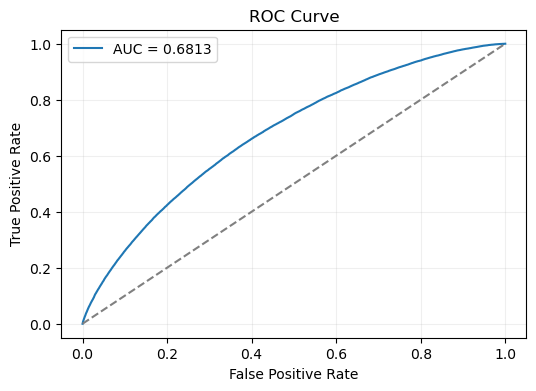

PR AUC (Area under Precision-Recall): 0.3414


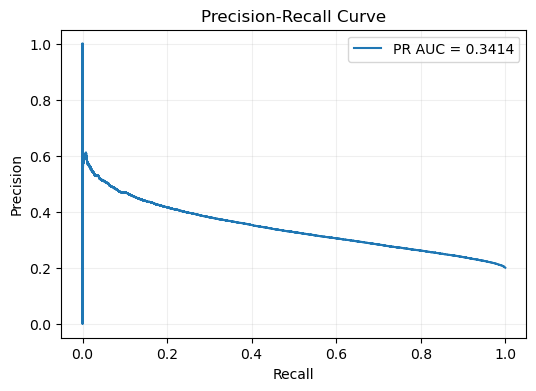

Confusion Matrix:
 [[132032  83654]
 [ 18945  34905]]

Classification Report:
               precision    recall  f1-score   support

           0     0.8745    0.6121    0.7202    215686
           1     0.2944    0.6482    0.4049     53850

    accuracy                         0.6193    269536
   macro avg     0.5845    0.6302    0.5625    269536
weighted avg     0.7586    0.6193    0.6572    269536



In [ ]:
# Required imports
import numpy as np
import pandas as pd
from sklearn.metrics import (
    roc_auc_score, roc_curve,
    precision_recall_curve, auc,
    confusion_matrix, classification_report
)
import matplotlib.pyplot as plt

# Choose model probabilities to evaluate (example: LightGBM)
# Replace y_prob_lgb with the correct model probabilities variable if different
y_prob = y_prob_lgb  # or y_prob_rf or y_prob_calibrated or y_prob_lr
y_pred = (y_prob >= 0.5).astype(int)

# AUROC
auc_score = roc_auc_score(y_test, y_prob)
print("AUROC (ROC AUC):", round(auc_score, 4))

# ROC Curve (plot)
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.4f}')
plt.plot([0,1],[0,1],'--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(alpha=0.2)
plt.show()

# Precision-Recall and PR-AUC
precision, recall, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall, precision)
print("PR AUC (Area under Precision-Recall):", round(pr_auc, 4))

plt.figure(figsize=(6,4))
plt.plot(recall, precision, label=f'PR AUC = {pr_auc:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(alpha=0.2)
plt.show()

# Confusion matrix and classification report
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=4))


In [ ]:
from sklearn.metrics import precision_recall_fscore_support

thresholds = np.linspace(0.0, 1.0, 21)
results = []
for t in thresholds:
    preds = (y_prob >= t).astype(int)
    p, r, f1, _ = precision_recall_fscore_support(y_test, preds, average='binary', zero_division=0)
    tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
    results.append((t, p, r, f1, tp, fp, fn, tn))

res_df = pd.DataFrame(results, columns=['threshold','precision','recall','f1','TP','FP','FN','TN'])
print(res_df.sort_values('f1', ascending=False).head(10))


    threshold  precision    recall        f1     TP      FP     FN      TN
10       0.50   0.294410  0.648189  0.404909  34905   83654  18945  132032
9        0.45   0.271680  0.751699  0.399113  40479  108516  13371  107170
11       0.55   0.320884  0.527168  0.398938  28388   60080  25462  155606
8        0.40   0.252650  0.838180  0.388267  45136  133514   8714   82172
7        0.35   0.236749  0.905107  0.375324  48740  157132   5110   58554
12       0.60   0.352983  0.398644  0.374427  21467   39349  32383  176337
6        0.30   0.224338  0.949471  0.362925  51129  176782   2721   38904
5        0.25   0.215140  0.976713  0.352611  52596  191877   1254   23809
4        0.20   0.208292  0.990511  0.344203  53339  202739    511   12947
3        0.15   0.203935  0.996843  0.338599  53680  209541    170    6145


Top 15 features by gain:
             feature  importance_gain  importance_split
4             fico_n    365322.205861               928
10    loan_to_income    327760.521864               897
0                 id    159630.602420              1620
2              dti_n    137028.018497              1012
7            purpose     79166.189606               645
8   home_ownership_n     67270.172435               386
3          loan_amnt     51509.547309              1064
9         addr_state     50674.610668              1134
1            revenue     20499.522915               870
6         emp_length     19621.064848               444
5       experience_c         0.000000                 0
11  loan_utilization         0.000000                 0


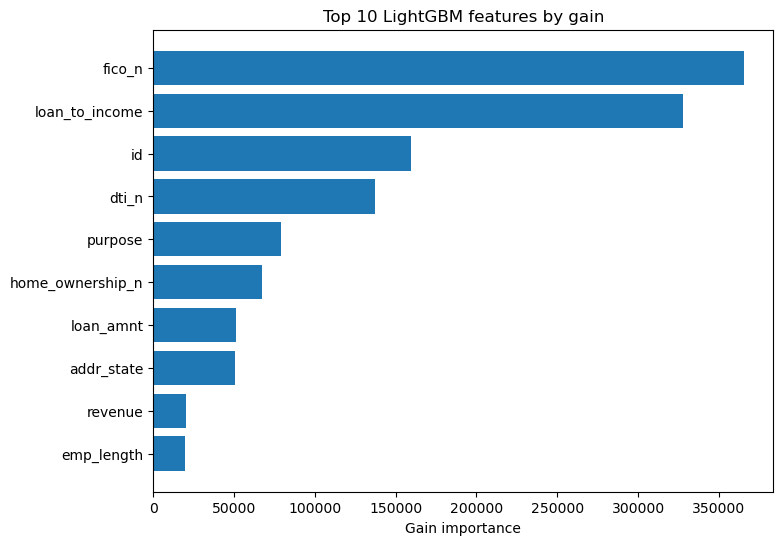

In [ ]:
# LightGBM feature importance (global)
feature_names = X_train.columns if hasattr(X_train, "columns") else [f"f{i}" for i in range(X_train.shape[1])]
importances = pd.DataFrame({
    'feature': feature_names,
    'importance_gain': lgb_model.booster_.feature_importance(importance_type='gain'),
    'importance_split': lgb_model.booster_.feature_importance(importance_type='split')
}).sort_values(by='importance_gain', ascending=False)

print("Top 15 features by gain:")
print(importances.head(15))

# Plot top 10 importances
plt.figure(figsize=(8,6))
plt.barh(importances['feature'].head(10)[::-1], importances['importance_gain'].head(10)[::-1])
plt.xlabel('Gain importance')
plt.title('Top 10 LightGBM features by gain')
plt.show()


shap

In [ ]:
pip install shap


  Using cached slicer-0.0.8-py3-none-any.whl.metadata (4.0 kB)
   ---------------------------------------- 0.0/549.1 kB ? eta -:--:--
   ---------------------------------------- 0.0/549.1 kB ? eta -:--:--
   ------------------- -------------------- 262.1/549.1 kB ? eta -:--:--
   ------------------- -------------------- 262.1/549.1 kB ? eta -:--:--
   ---------------------------------------- 549.1/549.1 kB 967.8 kB/s  0:00:00
Using cached slicer-0.0.8-py3-none-any.whl (15 kB)

   -------------------- ------------------- 1/2 [shap]
   -------------------- ------------------- 1/2 [shap]
   -------------------- ------------------- 1/2 [shap]
   -------------------- ------------------- 1/2 [shap]
   ---------------------------------------- 2/2 [shap]

Note: you may need to restart the kernel to use updated packages.


c:\Users\anusiya\anaconda3\Lib\site-packages\shap\explainers\_tree.py:587: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn(


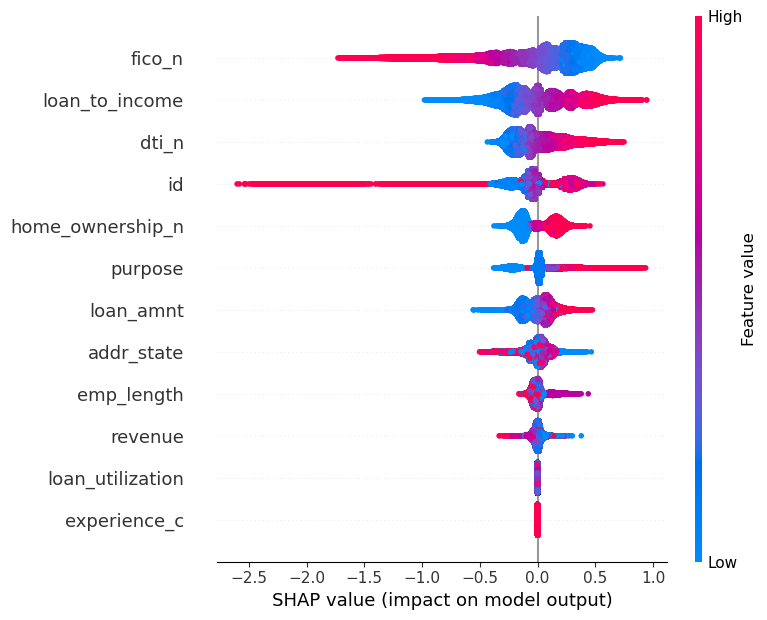

Top feature: fico_n


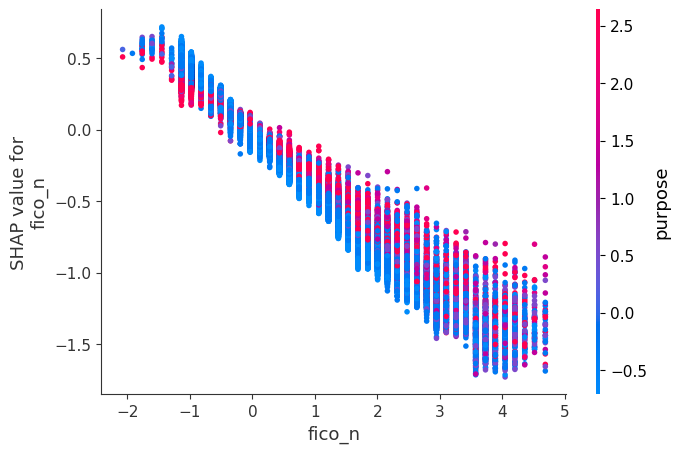

In [ ]:
import shap

# Use TreeExplainer for LightGBM / RandomForest / XGBoost
explainer = shap.TreeExplainer(lgb_model)
# If X_train is a DataFrame, pass .values for speed or keep as DataFrame for labels
shap_values = explainer.shap_values(X_test)  # for binary classification returns list [shap0, shap1] or array

# Global summary plot (requires Jupyter/Notebook; in VS Code it will render)
# If shap_values is a list, use shap_values[1] for the positive class
sv = shap_values[1] if isinstance(shap_values, list) else shap_values
shap.summary_plot(sv, X_test, feature_names=feature_names, show=True)

# Show dependence plot for top feature
top_feat = importances['feature'].iloc[0]
print("Top feature:", top_feat)
shap.dependence_plot(top_feat, sv, X_test, feature_names=feature_names, show=True)


In [ ]:
import joblib
import os

os.makedirs("deliverables", exist_ok=True)

# Save cleaned dataset (combine X and y or use original cleaned df)
cleaned_path = "deliverables/cleaned_dataset.csv"
df.to_csv(cleaned_path, index=False)
print("Saved cleaned dataset to", cleaned_path)

# Save LightGBM model
model_path_lgb = "deliverables/lgb_model.pkl"
joblib.dump(lgb_model, model_path_lgb)
print("Saved LightGBM model to", model_path_lgb)

# Save scaler
scaler_path = "deliverables/scaler.pkl"
joblib.dump(scaler, scaler_path)
print("Saved scaler to", scaler_path)

# If you used calibrated_lr
calib_model_path = "deliverables/calibrated_logreg.pkl"
joblib.dump(calibrated_lr, calib_model_path)
print("Saved calibrated logistic regression to", calib_model_path)


Saved cleaned dataset to deliverables/cleaned_dataset.csv
Saved LightGBM model to deliverables/lgb_model.pkl
Saved scaler to deliverables/scaler.pkl
Saved calibrated logistic regression to deliverables/calibrated_logreg.pkl
